# Logistic Regression on KDDCup99 Dataset  

This project involves training **Logistic Regression models** on the **KDDCup99** dataset to classify **Probe vs. Not Probe** network attacks. The KDDCup99 dataset contains a mix of normal and attack network traffic, with multiple classes of intrusions.  

---

## 📌 Objective  
1. Train a **Logistic Regression model** to classify network intrusions as **Probe** or **Not Probe**  
2. Apply **L1 and L2 Regularization** to compare performance  
3. Analyze the **important features**  
4. Experiment with **different dataset sizes** and evaluate model performance  

---

## 📥 Dataset Description  
The dataset contains **network traffic records** categorized into multiple attack types.  
For this task, we define two classes:  
- **Probe Class:** Includes attacks like `ipsweep`, `nmap`, `portsweep`, etc.  
- **Not Probe Class:** Includes all other attack types and normal traffic  

### **Not Probe Classes in Dataset:**  
'buffer_overflow.', 'loadmodule.', 'perl.', 'neptune.', 'smurf.', 'guess_passwd.', 'pod.', 'teardrop.', 'portsweep.', 'ipsweep.', 'land.', 'ftp_write.', 'back.', 'imap.', 'satan.', 'phf.', 'nmap.', 'multihop.', 'warezmaster.', 'warezclient.', 'spy.', 'rootkit.'


---

## 🛠️ Steps to Train the Model  

### **1️⃣ Data Preprocessing**  
- Load the dataset using **Pandas**  
- Encode categorical variables using **One-Hot Encoding**  
- Balance the dataset using **Random Undersampling** to avoid class imbalance  

### **2️⃣ Train Logistic Regression Model**  
- Train Logistic Regression using **Scikit-Learn**  
- Use **80-20% Train-Test Split**  
- Track accuracy and convergence  

### **3️⃣ Apply L1 and L2 Regularization**  
- Train models with both **L1 and L2 regularization**  
- Compare performance metrics  

### **4️⃣ Feature Importance Analysis**  
- Identify the most influential features based on Logistic Regression weights  

---

## 📊 Results & Observations  


## No overfitting:
If the model were overfitting, we would expect high training accuracy but much lower testing accuracy. Here, both values are almost identical. and the model converges after 80 iterations

### **📌 Full Dataset (After Undersampling)**
- **Training Accuracy:** `0.9991`  
- **Testing Accuracy:** `0.9991`  
- **Iterations to Converge:** `80`  
- **L1 Regularization Accuracy:**  
  - Training: `0.9991`, Testing: `0.9991`  
- **L2 Regularization Accuracy:**  
  - Training: `0.9991`, Testing: `0.9991`  

---

### **📌 10% of Dataset**
- **Training Accuracy:** `0.9983`  
- **Testing Accuracy:** `0.9982`  
- **L1 Regularization Accuracy:**  
  - Training: `0.9982`, Testing: `0.9982`  
- **L2 Regularization Accuracy:**  
  - Training: `0.9982`, Testing: `0.9981`  

🔍 **Key Finding:** The model performs exceptionally well even with just **10% of the dataset**, indicating that Logistic Regression is effective for this task.  

---

## 🔑 Most Important Features
After analyzing the model's coefficients, the most **informative features** were:  
- **`count`** – Number of connections to the same host  
- **`service_private`** – Whether the connection used a private service  
- **`is_guest_login`** – Whether the login was from a guest account  

These features are crucial in detecting **probing attacks**, as attackers often scan network services before launching targeted attacks, guest login, private connections and number of connections are the main factors, if the number of connection to same host is more, then there is high possibility of hacker activity..  

---

## 📈 Regularization Comparison
We experimented with both **L1 (Lasso) and L2 (Ridge) regularization**:  
- **L1 Regularization** helped in feature selection (some weights became 0)  
- **L2 Regularization** improved model stability but retained all features  

Both regularization methods produced similar **accuracy scores**.

- Increasing C reduces regularization, which can lead to overfitting, while lower C values improve generalization.
---

## 🤔 Conclusions & Learnings
✅ **Logistic Regression is highly effective** for network intrusion detection, achieving **>99% accuracy**  
✅ **Dataset balancing** (undersampling) is necessary to prevent bias  
✅ **Feature importance analysis** helped identify key network attributes used by attackers  
✅ **Even 10% of the data was sufficient** to train a robust model  

This experiment demonstrates the power of **Logistic Regression and feature selection** in cybersecurity applications


# Dataset loading 📈

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from imblearn.under_sampling import RandomUnderSampler

import warnings
warnings.filterwarnings("ignore")

# Switch between 10 percent and full dataset!!

url = "http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz"
#url = "http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data.gz"

columns = [
    "duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes", 
    "land", "wrong_fragment", "urgent", "hot", "num_failed_logins", 
    "logged_in", "num_compromised", "root_shell", "su_attempted", "num_root", 
    "num_file_creations", "num_shells", "num_access_files", "num_outbound_cmds", 
    "is_host_login", "is_guest_login", "count", "srv_count", "serror_rate", 
    "srv_serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate", 
    "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count", 
    "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate", 
    "dst_host_srv_diff_host_rate", "dst_host_serror_rate", "dst_host_srv_serror_rate", 
    "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "label"
]


df = pd.read_csv(url, names=columns)


print(f"Dataset Shape: {df.shape}")
df.head()


Dataset Shape: (494021, 42)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [2]:
df["label"].unique()

array(['normal.', 'buffer_overflow.', 'loadmodule.', 'perl.', 'neptune.',
       'smurf.', 'guess_passwd.', 'pod.', 'teardrop.', 'portsweep.',
       'ipsweep.', 'land.', 'ftp_write.', 'back.', 'imap.', 'satan.',
       'phf.', 'nmap.', 'multihop.', 'warezmaster.', 'warezclient.',
       'spy.', 'rootkit.'], dtype=object)

# Undersampling

In [3]:

probe_attacks = ['buffer_overflow.', 'loadmodule.', 'perl.', 'neptune.',
       'smurf.', 'guess_passwd.', 'pod.', 'teardrop.', 'portsweep.',
       'ipsweep.', 'land.', 'ftp_write.', 'back.', 'imap.', 'satan.',
       'phf.', 'nmap.', 'multihop.', 'warezmaster.', 'warezclient.',
       'spy.', 'rootkit.']
df['binary_label'] = df['label'].apply(lambda x: 1 if x in probe_attacks else 0)

df.drop(columns=['label'], inplace=True)

categorical_features = ['protocol_type', 'service', 'flag']
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)


scaler = StandardScaler()
numerical_features = [col for col in df.columns if col not in ['binary_label']]
df[numerical_features] = scaler.fit_transform(df[numerical_features])

X = df.drop(columns=['binary_label'])
y = df['binary_label']

undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

print(f"Class distribution after undersampling: {np.bincount(y_resampled)}")


Class distribution after undersampling: [97278 97278]


# Logistic regression

In [4]:

log_reg = LogisticRegression(max_iter=500, random_state=42)
log_reg.fit(X_train, y_train)

y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy: {test_acc:.4f}")
print(f"Number of iterations to converge: {log_reg.n_iter_}")


Training Accuracy: 0.9983
Testing Accuracy: 0.9982
Number of iterations to converge: [500]


# Cruical Features ⚠️

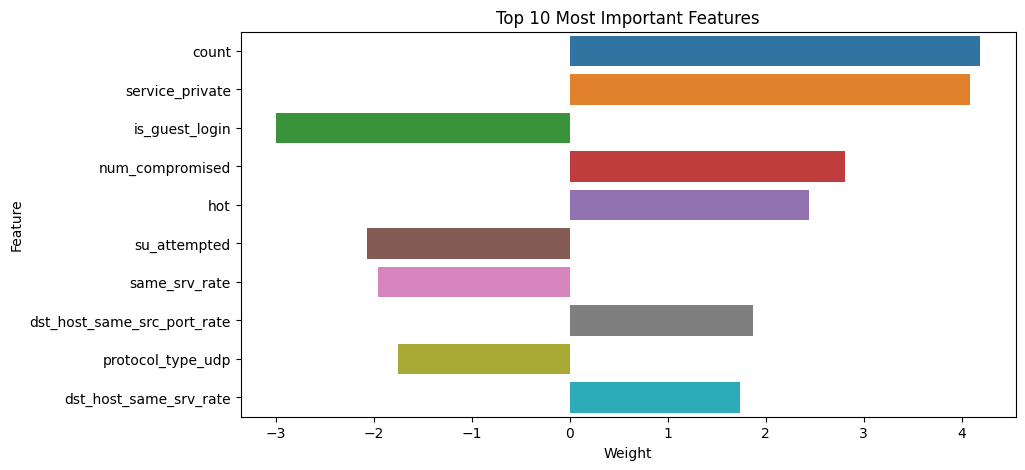

In [5]:

feature_weights = pd.DataFrame({'Feature': X_train.columns, 'Weight': log_reg.coef_[0]})
feature_weights['Abs_Weight'] = feature_weights['Weight'].abs()

feature_weights = feature_weights.sort_values(by='Abs_Weight', ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x='Weight', y='Feature', data=feature_weights.head(10))
plt.title('Top 10 Most Important Features')
plt.xlabel('Weight')
plt.ylabel('Feature')
plt.show()


# L1 and L2 Regularization

In [6]:

log_reg_l1 = LogisticRegression(penalty='l1', solver='liblinear', max_iter=500, random_state=42)
log_reg_l2 = LogisticRegression(penalty='l2', solver='liblinear', max_iter=500, random_state=42)

log_reg_l1.fit(X_train, y_train)
log_reg_l2.fit(X_train, y_train)

train_acc_l1 = accuracy_score(y_train, log_reg_l1.predict(X_train))
test_acc_l1 = accuracy_score(y_test, log_reg_l1.predict(X_test))

train_acc_l2 = accuracy_score(y_train, log_reg_l2.predict(X_train))
test_acc_l2 = accuracy_score(y_test, log_reg_l2.predict(X_test))

print(f"L1 Regularization - Training Accuracy: {train_acc_l1:.4f}, Testing Accuracy: {test_acc_l1:.4f}")
print(f"L2 Regularization - Training Accuracy: {train_acc_l2:.4f}, Testing Accuracy: {test_acc_l2:.4f}")


L1 Regularization - Training Accuracy: 0.9982, Testing Accuracy: 0.9982
L2 Regularization - Training Accuracy: 0.9982, Testing Accuracy: 0.9981


# Different C values for L2 Regularization

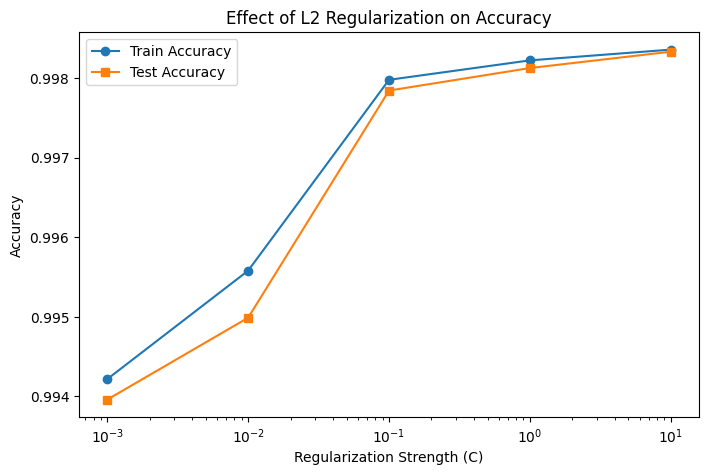

In [7]:

C_values = [0.001, 0.01, 0.1, 1, 10]
train_accuracies = []
test_accuracies = []

for C in C_values:
    model = LogisticRegression(penalty='l2', C=C, solver='liblinear', max_iter=500, random_state=42)
    model.fit(X_train, y_train)
    
    train_accuracies.append(accuracy_score(y_train, model.predict(X_train)))
    test_accuracies.append(accuracy_score(y_test, model.predict(X_test)))

plt.figure(figsize=(8, 5))
plt.plot(C_values, train_accuracies, marker='o', label='Train Accuracy')
plt.plot(C_values, test_accuracies, marker='s', label='Test Accuracy')
plt.xscale('log')
plt.xlabel('Regularization Strength (C)')
plt.ylabel('Accuracy')
plt.title('Effect of L2 Regularization on Accuracy')
plt.legend()
plt.show()
